## Cameron Roehlk
## ABE 516X
## KMeans Assignment

This notebook can be found on GitHub under isu-abe/516x/croehlk named Roehlk KMeans Assignment.ipynb

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np

In [43]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Convert the Species column from strings to integers to help with calculating the accuracy score later on

In [91]:
codes = {'setosa':0, 'versicolor':1, 'virginica':2}

In [92]:
iris['species'] = iris['species'].map(codes)

In [90]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [75]:
#Find how many different species there are in the iris dataset
len(iris['species'].unique().tolist())

3

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


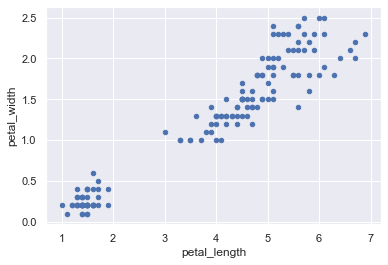

In [76]:
#Create a plot to look at the relationship between petal length and width
iris.plot(x='petal_length', y ='petal_width', kind = 'scatter')

In [77]:
# Create a new data frame based on just the features I want to look at
X = pd.DataFrame(data = iris, columns = ['petal_length', 'petal_width'])

In [78]:
# Because there are three different species, I am using going to split the data into three clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [79]:
# See what cluster Kmeans predicted for each each data point
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [80]:
#Convert the dataframe into an array so I can plot this dataset
X = X.to_numpy()

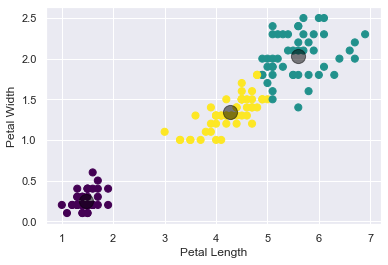

In [99]:
# plots the simulated dataset, colored by its cluster number
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
# plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

From the plot we see the kmeans was able to distinctly seperate the data into three clusters

In [82]:
clusters=kmeans.fit_predict(X)

In [84]:
ytrue=iris['species']
ytrue=ytrue.to_numpy()

In [85]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

In [86]:
from scipy.stats import mode
centers, labels = find_clusters(X, 3)
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(ytrue[mask])[0]

In [89]:
from sklearn.metrics import accuracy_score

accuracy_score(ytrue, labels)

0.96

The three clusers that kmeans calculated represents the three different species with 96% accuracy. I was surprised with how accuracte the prediction was based on how close the two species are together in the upper right corner of the plot.